### SVD (Singular Value Decomposion)
---

* m x n의 Matrix를 $U\Sigma V^{T}$ 로 분해하여 나타내는 것
* $U, V$를 Singular vector라 하며 각각의 vector가 직교하는 성질을 가짐
* 추가적으로 여러개의 SVD 기법이 존재하는데, truncated SVD는 모든 Vector의 값을 가져오는것이아닌 해당 matrix를 구성하는데 가장 중요한 요소를 얼마나 남기느냐에 대하여 선택
* 영상 압축등에서 사용함

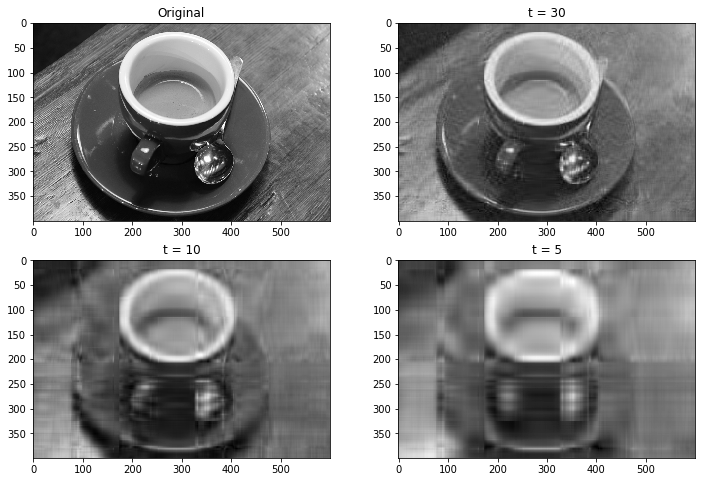

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
import cv2

coffee_ori = data.coffee()

coffee_gray = cv2.cvtColor(coffee_ori,cv2.COLOR_RGB2GRAY)
# plt.imshow(coffee_gray,cmap='gray')
imgmat = np.array(coffee_gray,dtype = float)
imgmat.shape = (400,600)
imgmat = np.matrix(imgmat)

U, sigma, V = np.linalg.svd(imgmat)

reconstimg_ori = coffee_gray
reconstimg_t30 = np.matrix(U[:, :30]) * np.diag(sigma[:30]) * np.matrix(V[:30, :])
reconstimg_t10 = np.matrix(U[:, :10]) * np.diag(sigma[:10]) * np.matrix(V[:10, :])
reconstimg_t5 = np.matrix(U[:, :5]) * np.diag(sigma[:5]) * np.matrix(V[:5, :])

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(reconstimg_ori, cmap='gray')
# 영상을 표현하는데 30 x 30개의 vector씩 사용함
plt.subplot(2,2,2)
plt.title("t = 30")
plt.imshow(reconstimg_t30, cmap='gray')

# 영상을 표현하는데 10 x 10개의 vector씩 사용함
plt.subplot(2,2,3)
plt.title("t = 10")
plt.imshow(reconstimg_t10, cmap='gray')

# 영상을 표현하는데 5 x 5개의 vector씩 사용함
#처음의 이미지에 비해 이미지를 판단함에 있어 어려워질 정도로 이미지의 데이터가 남아있지 않음
plt.subplot(2,2,4)
plt.title("t = 5")
plt.imshow(reconstimg_t5, cmap='gray')

plt.show()

### PCA (Principal Component Analysis)
---
* 데이터의 분산(variance)를 최대한 유지하면서 서로 직교하는 새로운 basis를 찾아
* 고차원 --> 저차원으로 변환하는 기법
* 차원축소(dimension reduction) 이라고도 함

In [28]:
import numpy as np
from sklearn.decomposition import pca
#랜덤으로 데이터 생성
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)


#sklearn 라이브러리를 통한 singular value, vector 분포비율 나타내기
pca_met = pca.PCA(n_components=3)
result = pca_met.fit(X)

print('singular value :', result.singular_values_)
print('singular vector :\n', result.components_.T)
# 1번째 차원에 대해 84%, 두번째에 14% 세번째에 1%의 분산을 가지고있음
print('explained variance ratio :', result.explained_variance_ratio_)

# 3차원 --> 2차원으로 차원을 줄인 예
pca = pca.PCA(n_components=0.95)
X_proj = pca.fit_transform(X)
print('principal component vec :\n', pca.components_.T)




singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]
explained variance ratio : [0.84248607 0.14631839 0.01119554]
principal component vec :
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]
